<h1>Creating Databases With Flask Using MySQL

Databases are integral components of building web applications. Throughout the life-cycle of a web application, the user sends bits of data that are neended to be stored for future reference. Simultaneously, the user also requests information from where they are stored. Data and information are valuable to make web applications valuable. It is important to receive and provide data to your web application and in order to do that, we need a database that can store that information and allows us to access it later.



<h2>Introduction to python flask and what it is used for?

Flask is a Python framework for creating web applications. When we think about Python, the de facto framework that comes to our mind is the Django framework. But from a Python beginner's perspective, Flask is easier to get started with, when compared to Django. We can use flask for flask database integration.

In this tutorial, we are going to learn how to connect Flask to MySQL database and how you can insert the formed data. We'll be using Flask, a Python web application framework, to create our application, with MySQL as the back end.

<h2>For this example, we are going to cover the following:

We will be creating a registeration page for "Blood Donation Bootcamp". The registeration page will allow users to enter their first name, last name, email and age. They can also login to their portal and modify/edit or delete their registeration request. In this tutorial, we will first start with setting up the flask work environment and then setting up connections between flask and database.

<h3>1. Setting up the work environment

Setting up flask is pretty simple and quick. With pip package manager, all we need to do is: 

In [2]:
pip install flask

Once you're done with installing Flask, create a folder called FlaskApp. Navigate to the FlaskApp folder and create a file called app.py. Import the flask module and create an app using Flask as shown:

In [3]:
from flask import Flask
app = Flask(__name__)

Now define the basic route / and its corresponding request handler:

In [ ]:
app@route("/")
def main():
    return "Welcome!"

Next, check if the executed file is the main program and run the app:

In [ ]:
if __name__=="__main__":
    app.run()

Save the changes and execute app.py:

In [ ]:
python app.py

<h3>2. Creating files using Visual Studio Code

To get started, we just need an IDE for creating python files. I am using Visual Studio code and MySQL Database and that's it. You are all good to go!!

<h4> Step 1: 

Open VS Code and create a new python file "app.py" and type the below code to your "app.py" file

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    return render_template('index.html')

if __name__ == '__main__':
    app.run()

<h4> Step 2: 

Now you need to create a simple HTML page with four text fields, first name, last name, email, age and a submit button. To do this, create a folder named "Templates" inside it and create a file "index.html" and copy the code below.

In [ ]:
<HTML>
    <BODY bgcolor="cyan">
    <form method="POST" action="">
        <center>
        <H1>Welcome to Blood Drive </H1> <br>
        First Name <input type = "text" name= "fname" /> <br>
        Last Name <input type = "text" name = "lname" /> <br>
        Email <input type = "text" name = "email" /> <br>
        Age <input type = "text" name = "age" /> <br>
        <input type = "submit">
        <a href="login.html">Already Registered? Click here

        </center>
    </form>
    </BODY>
    </HTML>

Upon running the following code, you must see the page below.

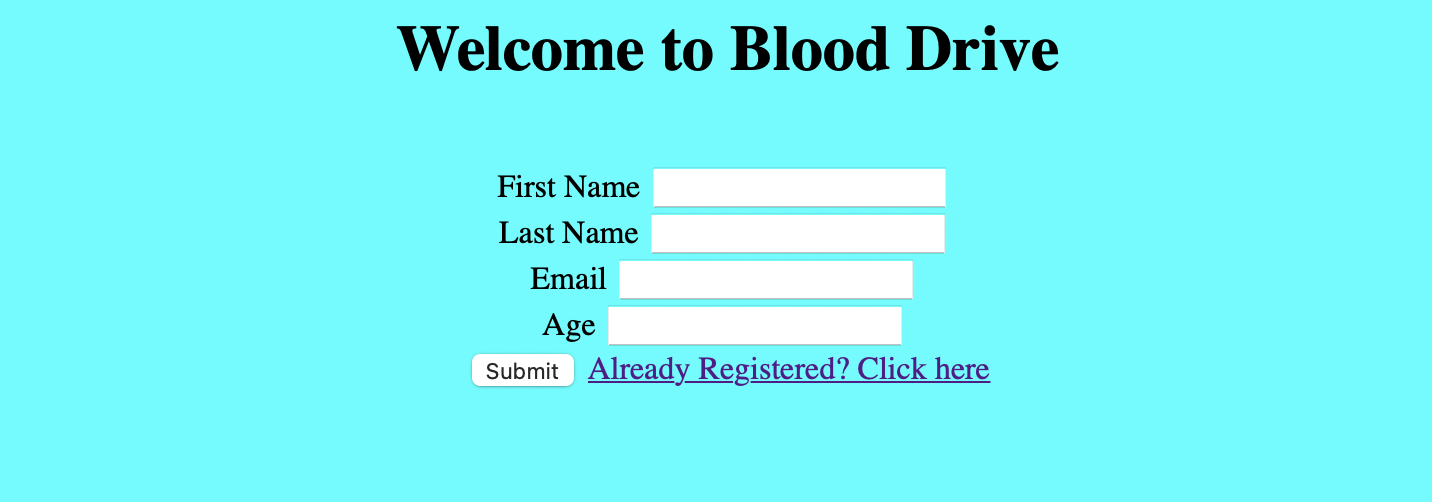

You can create all the html pages with the similar concept for this tutorial. Let's create another "login.html" file to create a basic structure for the login page. Here's the code:

In [ ]:
<HTML>
    <BODY bgcolor="cyan">
    <form method="POST" action="">
        <center>
            <H1>Welcome To Blood Drive </H1> <br>
            Email <input type = "text" name = "email" /> <br>
            <button type="submit">Fetch my details</button>
        </center>
        
    </form>
    </BODY>
    </HTML>

Upon running the following code, you must see the page below.

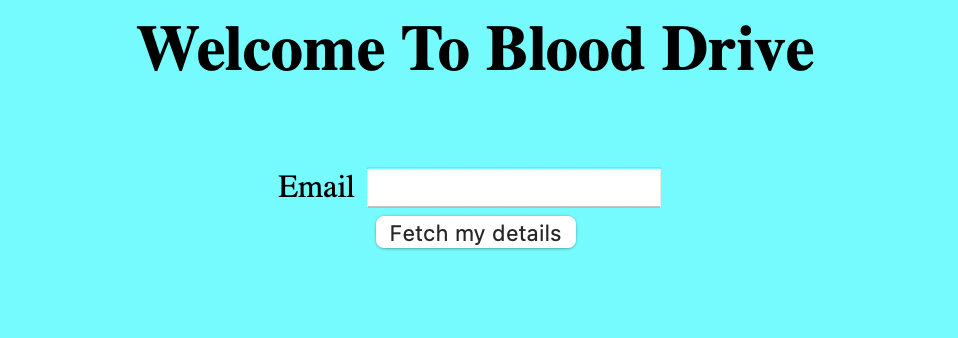

<h3>3. Creating Database connection with MySQL for storing information and logging in

<h4> Step 1: 

Now we have developed our form. The next step is database connection. To create a table, use the query below.

In [ ]:
drop database db;

create database db;

use db;

CREATE TABLE MyAppUsers(
	firstName VARCHAR(15),
    lastName VARCHAR(15),
    email VARCHAR(15) primary key,
    age VARCHAR(15)
    );
    
    
select * from myappusers;

SELECT * FROM myappusers WHERE email = "a";


First, we have created a database table using the query "CREATE TABLE MyAppUsers". Then we have created a query "SELECT * FROM myappusers WHERE email = "a";" for the users to login using their primary key email.

Finally, to run these queries, we can use something like "select * from myappusers;"

Now copy the following code and paste it in the "app.py" file.

In [ ]:
from flask import Flask, render_template, request
from flask_mysqldb import MySQL

app = Flask(__name__)

email_globe = ""


app.config['MYSQL_HOST'] = 'localhost'
app.config['MYSQL_USER'] = 'root'
app.config['MYSQL_PASSWORD'] = 'yourpassword'
app.config['MYSQL_DB'] = 'db'

mysql = MySQL(app)
@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == "POST":
        details = request.form
        firstName = (str)(details['fname'])
        lastName = (str)(details['lname'])
        email = (str)(details['email'])
        age = (str)(details['age'])
        cur = mysql.connection.cursor()

        print("Came here")

        cur.execute(f'Insert into MyAppUsers values ("{firstName}" , "{lastName}","{email}",{age});')

        mysql.connection.commit()
        cur.close()
    return render_template('index.html')
if __name__ == '__main__':
    app.run()

This part of the code will let the user enter their information and will store it into the datababse table "MyAppUsers". We have used "cur.execute(f'Insert into MyAppUsers values ("{firstName}" , "{lastName}","{email}",{age});')" query for that.

Now let's write a query to let the user login into their portal. Now copy the following code and paste it in "app.py" file below the already existing code.

In [ ]:
@app.route('/login.html', methods=['GET', 'POST'])
def login():
    
    if request.method == "POST":
        details = request.form
        email = (str)(details['email'])

        print("came here")

        cur = mysql.connection.cursor()

        print("Email is", email)

        cur.execute(f'Select * from MyAppUsers where email = "{email}";')
        rows = cur.fetchall() 

        if rows == None:
            print("There are no results for this query")
        else:
            print("rows are", rows[0])
            global email_globe
            email_globe = rows[0][2]
            return render_template("display.html", rows = rows[0])


        mysql.connection.commit()
        cur.close()

    return render_template('login.html')

This part of the code will allow the users to login and view/modify and delete their registeration. We are using our primary key value "email" to setup our login. We are using the following query "cur.execute(f'Select * from MyAppUsers where email = "{email}";')"

<h4> Step 2: 

Let's run our code with the following command in the terminal:

In [ ]:
python3 app.py

Now go ahead and enter your information and click "Submit". Now run "select * from myappusers;" and you can see the following information updated to your table. After doing so, you can repeat this process and try logging in using your email and hit "Fetch my details". 

<h3>4. Creating database connection with MySQL for modify/edit and delete information

<h4> Step 1: 

Let's create another "modify.html" file to create a basic structure for the modify page. Here's the code:

In [ ]:
<HTML>
    <BODY bgcolor="cyan">
    <form method="POST" action="">
        <center>
        <H1>Welcome To Blood Drive </H1> <br>
        First Name <input type = "text" name= "fname"  /> <br>
        Last Name <input type = "text" name = "lname" /> <br>
        Email <input type = "text" name = "email" /> <br>
        Age <input type = "text" name= "age" /> <br>
        

        <input type = "submit" name = "Update/Modify"> <br> 
        </center>
        
    </form>
    </BODY>
    </HTML>

Let's write a query for modify/edit operation in database.

In [ ]:
UPDATE myappusers
SET firstName = "a", lastName = "a", age = 2
WHERE email = "a";

We already created a database table "MyAppUsers" earlier in this tutorial. The query above will allow the database to modify/update user's information and store it back in the table.

To run this query, use "select * from myappusers;"

Now copy the following code and paste it in the "app.py" file below your existing code.

In [ ]:
@app.route('/modify.html', methods=['GET', 'POST'])
def modify():
    
    
    if request.method == "POST":

        print("came to modify")

        form = request.form

        details = request.form
        firstName = (str)(details['fname'])
        lastName = (str)(details['lname'])
        email = (str)(details['email'])
        age = (str)(details['age'])

        print("came here")

        cur = mysql.connection.cursor()

        print("Email is", email)

        global email_globe
        email_globe = email
        cur.execute(f'Update MyAppUsers set firstName = "{firstName}", lastName = "{lastName}", age = {age} where email = "{email}";')

        print("Change made")

        mysql.connection.commit()
        cur.close()

    return render_template('modify.html')

This part of the code will allow the users to modify/edit their information and store it back to the database. We will be using "cur.execute(f'Update MyAppUsers set firstName = "{firstName}", lastName = "{lastName}", age = {age} where email = "{email}";')" query to do so.

Let's create another "delete.html" file to create a basic structure for the delete page. Here's the code:

In [ ]:
<HTML>
    <BODY bgcolor="cyan">
    <form method="POST" action="">
        <center>
        <H1>Welcome To Blood Drive </H1> <br>        
        <button type="submit">Delete my details</button>
        </center>
        
    </form>
    </BODY>
    </HTML>

Now let's write a query for delete operation in database.

In [ ]:
DELETE FROM myappusers
WHERE email = "a";

The query above will allow the users to delete their registeration for blood donation.

Now copy the following code and paste it in the "app.py" file below your existing code.

In [ ]:
@app.route("/delete.html", methods=['GET', 'POST'])
def delete():

    if request.method == "POST":

        print("Came for delete")
        global email_globe

        cur = mysql.connection.cursor()

        print("Email is", email_globe)
        
        
        cur.execute(f'Delete from myappusers where email = "{email_globe}";')

        print("yes")
        
        mysql.connection.commit()
        cur.close()
    
    return render_template("delete.html")



if __name__ == '__main__':
    app.run()

This part of the code allows users to delete their existing information. We are using "cur.execute(f'Delete from myappusers where email = "{email_globe}";')" query to do so.

<h4> Step 2: 

Let's run our code with the following command in the terminal:

In [ ]:
python3 app.py

After running the following command, open your web browser and enter all the information and click "Sumbit". I have entered "Jack Smith" as my first and last name, "jsmith@mst.edu" ad my email and "34" to be my age. Now, when I click "Already registered? Click here" and I enter my email and click "Fetch my details", I see the following page below.

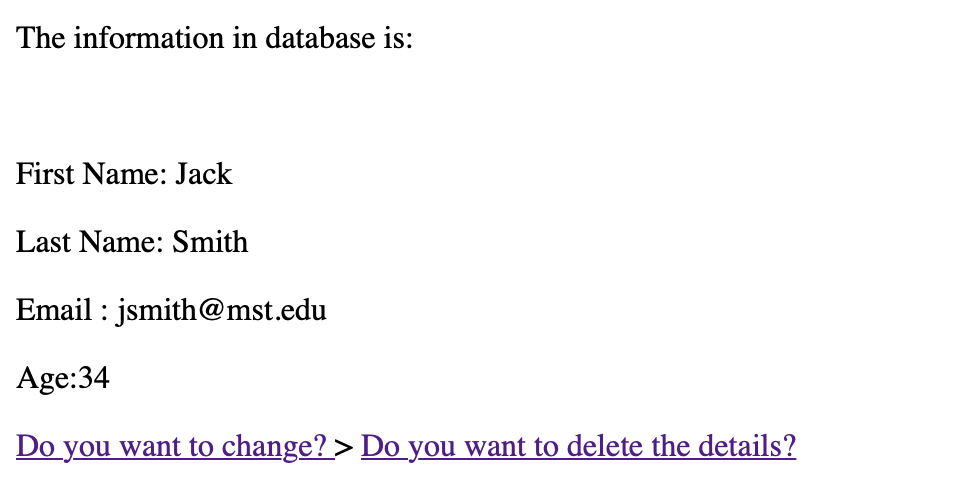

Now let's try to change the following information. I would like to remove my age from the current registeration. For doing so, click "Do you want to change?". You will see the following page below.

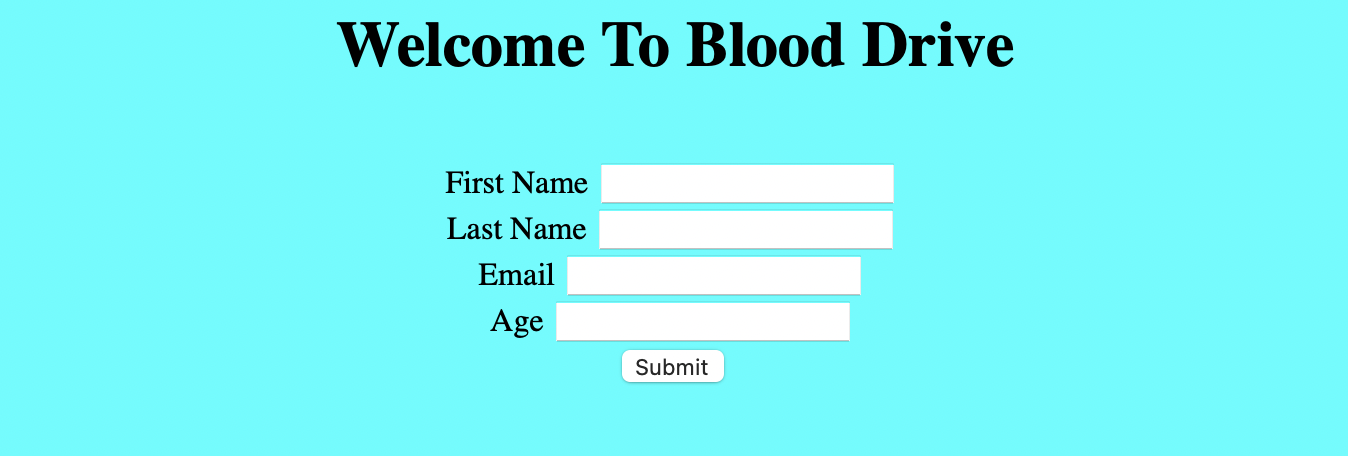

You can now go ahead and change your registered information and click "Submit". Run "select * from myappusers;" again and you can see the following information has been updated to your database table.

You can repeat the same process to delete your registered information. When you click on "Do you want to delete the details?", you will see the following page below

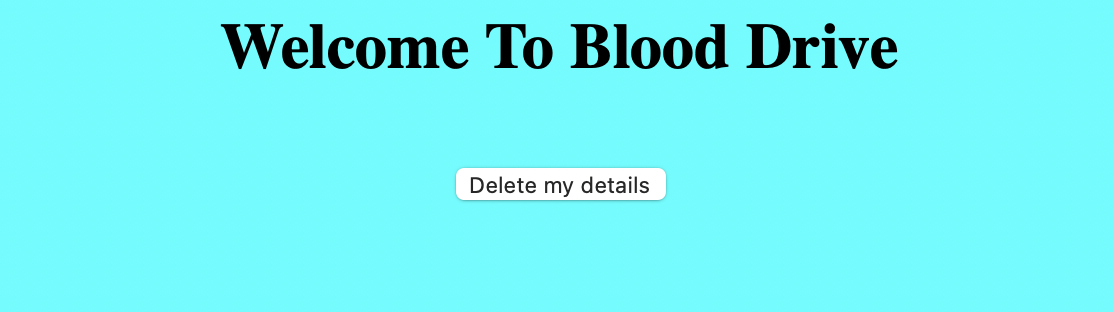

Now click "Delete my details" and run the "select * from myappusers;" and you will see that the information has been deleted from from the database table.

Isn't this fun? I hope you liked this tutorial and congratulations on coming so far!